In [24]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models import KeyedVectors

In [59]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# sentences = [['republican', 'pro-life', 'guns', 'rights', 'freedom', 'god', 'religion'],
# 			['democratic', 'abortion', 'liberal', 'sustainability', 'environment']]

In [60]:
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

Word2Vec(vocab=14, vector_size=100, alpha=0.025)


In [61]:
# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']


In [66]:
# access vector for one word
print(model.wv['more'])

[ 8.1322715e-03 -4.4573355e-03 -1.0683584e-03  1.0063648e-03
 -1.9111396e-04  1.1481761e-03  6.1138608e-03 -2.0272731e-05
 -3.2459665e-03 -1.5107298e-03  5.8972980e-03  1.5141011e-03
 -7.2426320e-04  9.3332455e-03 -4.9212836e-03 -8.3841087e-04
  9.1754105e-03  6.7494274e-03  1.5028549e-03 -8.8825608e-03
  1.1487460e-03 -2.2882556e-03  9.3682362e-03  1.2099266e-03
  1.4900636e-03  2.4064088e-03 -1.8360066e-03 -4.9996353e-03
  2.3242951e-04 -2.0141816e-03  6.6009331e-03  8.9401221e-03
 -6.7475555e-04  2.9770136e-03 -6.1076544e-03  1.6993236e-03
 -6.9262339e-03 -8.6940266e-03 -5.9002042e-03 -8.9564752e-03
  7.2775935e-03 -5.7720328e-03  8.2763508e-03 -7.2435453e-03
  3.4216738e-03  9.6749971e-03 -7.7854488e-03 -9.9450592e-03
 -4.3291473e-03 -2.6831317e-03 -2.7128935e-04 -8.8315513e-03
 -8.6175585e-03  2.8002094e-03 -8.2064085e-03 -9.0693375e-03
 -2.3404669e-03 -8.6318087e-03 -7.0566512e-03 -8.4011508e-03
 -3.0133009e-04 -4.5642997e-03  6.6271736e-03  1.5271592e-03
 -3.3414769e-03  6.10897

In [63]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, vector_size=100, alpha=0.025)


In [64]:
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

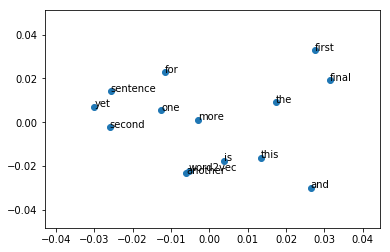

In [65]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [25]:
# Okay, that was cool, but lets try it on some real data
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [28]:
# calculate: (king - man) + woman = ?
# simplifies to: - man + king + woman = ?
# simplifies to: NEGATIVE(man), POSITIVE(woman), POSITIVE(king)
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118192911148071)]


In [44]:
# Lets try some more examples
result = model.most_similar(positive=['chaos'], negative=['order'], topn=10)
print(result)

[('mayhem', 0.5155529379844666), ('bedlam', 0.5017958879470825), ('utter_chaos', 0.47838151454925537), ('choas', 0.46450385451316833), ('anarchy', 0.4629233181476593), ('strife', 0.4458114802837372), ('pandemonium', 0.4301302134990692), ('turmoil', 0.42293694615364075), ('chaotic', 0.4138229191303253), ('civil_strife', 0.4083496928215027)]
